In [1]:
# This notebook is the outcome of my participation at the EGU2020 session G3.2
# It shows how to create a wordcloud based on the titles and abstracts
# displayed in the session.
#
# Compiled: Octavian Andrei, 2020

# Sharing Geoscience Online
In response to Covid19 pandemic, EGU2020 has decided to go virtual via the [<b>Sharing Geoscience Online</b>](https://egu2020.eu/sharing_geoscience_online/sharing_geoscience_online.html) experiment.
The experiment embraces the main [FOSS](https://en.wikipedia.org/wiki/Free_and_open-source_software) principles replacing software with science **free and open science!**

Abstracts and presentation materials are available online. Discussion is promoted via the public commenting option. Video links were not permitted but live, inter-active text-based session chat channels are organized for each individual session.

There is a tonne of information one can find 
on the event [EGU2020 website](https://www.egu2020.eu/).


<b>Note:</b><br>
I have never participated in such event. Now, I do have the opportunity to get first contact with the atmosphere. **This is just awesome!**
<br>


<div class=" alert alert-info"> 
    

# <span style="font-family:Comic Sans MS">Grabbing the opportunity</span>
    
</div>

**Why?** 
- to communicate about science to general public 

**What?**
- to attend one of the live text-based sessions

**How?**
- aggregate the session public information 
- produce representative visuals and/or takeaway points
- practice public communication

<div class=" alert alert-info"> 
    

# <span style="font-family:Comic Sans MS">Geodesy at EGU2020</span>
    
</div>

At EGU2020, <b>Geodesy (G)</b> discipline is divived in six main meeting themes:

- G1 – Geodetic Theory and Algorithms 
- G2 – Reference Frames and Geodetic Observing Systems 
- G3 – Geodynamics and Earth Fluids 
- G4 – Satellite Gravimetry, Gravity and Magnetic Field Modeling 
- G5 – Geodetic Monitoring of the Atmosphere 
- G6 – General Sessions

Each group includes 3 to 6 topical sessions.


On Wednesday evening, I joined session G3.2 [Observing geophysical signals in the Climate and Earth System through Geodesy](https://meetingorganizer.copernicus.org/EGU2020/displays/35331). 
​

There were 150+ active users enrolled in the discussion chat. Coordination was lively and constructive. I found the session intensive, interactive and inspiring. 
​

With these goodies in my mood, I decided to have also some fun with [python](https://www.python.org/) and **exploratory analysis** in a [Jupyther notebook](https://jupyter.org/). 
​

This is the outcome and I gladly share it with you in the EGU's spirit of **#shareEGU20**.

In [2]:
# So let's get started ...

<div class=" alert alert-info"> 
    

# <span style="font-family:Comic Sans MS">Notebook starts now!</span>
    
</div>

In [3]:
# necessary libraries. Be sure you have them installed!
import pandas as pd
import matplotlib.pyplot as plt

import operator
import wordcloud

from IPython.display import Image

In [4]:
# user defined function
def calculate_frequencies(text):
    """Returns word frequency map without punctuation and uninteresting words"""
    
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # split text in words
    words = [word.lower() for word in text.split()]

    frequencies = {}
    for word in words:
        # clean
        corrected_word = ''
        for c in word:
            if (c not in punctuations):
                corrected_word += c
        # disregard 
        if (corrected_word in uninteresting_words) or (len(corrected_word)<=3):
            continue
        # count
        frequencies[corrected_word] = frequencies.get(corrected_word, 0) + 1
    
    return frequencies

## Prepare data

In [5]:
# load data
A = pd.read_csv('abstracts_g32.csv')

## Quick overview

In [6]:
# How many displays are in the session?
A.shape[0]

31

In [7]:
# What information is included?
print(A.columns.values)

['EGU2020' 'AUTHORS' 'TITLE' 'ABSTRACT']


In [8]:
# How may single authors (first + co) are there?
authors = ', '.join(A['AUTHORS']).split('and')
authors = ', '.join(authors).split(',')
authors = [author.strip() for author in authors if author.strip()]
len(authors)

153

In [9]:
# Most contributions
pd.Series(authors).value_counts()[:2]

Jürgen Kusche     3
Henryk Dobslaw    3
dtype: int64

In [10]:
# first display record
A.loc[0]

EGU2020                                         EGU2020-10555
AUTHORS                 Susanna Werth and Manoochehr Shirzaei
TITLE       Seasonal variation in water storage, vertical ...
ABSTRACT    The establishment of the Inter-Commission Comm...
Name: 0, dtype: object

In [11]:
# What is the EGU number?
A.loc[0]['EGU2020']

'EGU2020-10555'

In [12]:
# Who were the authors
A.loc[0]['AUTHORS']

'Susanna Werth and Manoochehr Shirzaei'

In [13]:
# What is the title of this display?
A.loc[0]['TITLE']

'Seasonal variation in water storage, vertical land motion and well levels: Implications for groundwater storage change in Central Valley'

In [14]:
# And how the abstract looks like?
A.loc[0]['ABSTRACT']

'The establishment of the Inter-Commission Committee on "Geodesy for Climate Research" (ICCC) of the International Association of Geodesy (IAG) emphasizes on the usefulness of geodetic sensors for estimating high-resolution water mass variation, which is due to broad applications of geodetic tools ranging from water cycle studies to water resources management. As such, data from both GRACE missions continue to provide insight into the alarming rates of groundwater depletion in large aquifers worldwide. Observations of vertical land motion (VLM) from GPS and InSAR may reflect elastic responses of the Earth\'s crust to changes in mass load, including those in aquifers. However, above confined aquifers, VLM observations are dominated by poroelastic deformation processes. In previous works, Ojha et al. 2018 and 2019 show that GRACE-based estimates of groundwater storage change in the Central Valley, California, are consistent with those obtained by utilizing measurements of surface deforma

<div class=" alert alert-info"> 
    

### <span style="font-family:Comic Sans MS">Excellent now let's do some explotatory analysis on used words. First, we look at the titles and then the abstracts.</span>
    
</div>

## Titles

In [15]:
# list all display titles in this session
for idx, row in A.iterrows():
    print(idx+1, row['EGU2020'])
    print(row.TITLE)
    print('='*10)

1 EGU2020-10555
Seasonal variation in water storage, vertical land motion and well levels: Implications for groundwater storage change in Central Valley
2 EGU2020-19070
Exploring meso-scale soil water and groundwater storage changes within the USA through a Bayesian combination of GRACE data with monthly 12.5 km model simulations
3 EGU2020-6550
The Central European droughts of 2018 and 2019 observed with GRACE-Follow-On
4 EGU2020-20224
Monitoring climate-driven and anthropogenic impacts on hydrology and agriculture in South-Eastern Australia in the 21st century
5 EGU2020-20937
The water storage change anomaly and its causes in the middle-lower reaches of Yangtze River basin
6 EGU2020-21456
Multi-Mission GNSS Radio Occultation Climate Data Records at the Jet Propulsion Laboratory
7 EGU2020-6329
Applying the ICA method to extract the potential signals in GNSS timeseries
8 EGU2020-4643
The rate and acceleration of the global mean sea level revisited
9 EGU2020-193
GRACE observing a small s

In [16]:
# word frequency in the titles
text = ' '.join(A['TITLE'])
z = calculate_frequencies(text)

In [17]:
# How many unique words?
len(z.keys())

225

In [18]:
# How many words are in total?
sum(z.values())

310

In [19]:
# Top 10
sorted(z.items(), key=operator.itemgetter(1), reverse=True)[:10]

[('data', 8),
 ('water', 7),
 ('storage', 7),
 ('grace', 7),
 ('global', 7),
 ('change', 4),
 ('changes', 4),
 ('hydrological', 4),
 ('groundwater', 3),
 ('monitoring', 3)]

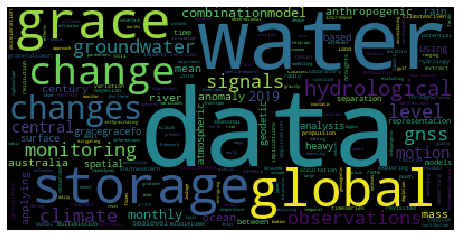

In [20]:
# let's translate into a simple wordcloud
# we go for the default parameters
cloud = wordcloud.WordCloud()
cloud.generate_from_frequencies(z)

myimage = cloud.to_array()
plt.imshow(myimage, interpolation = 'nearest')
plt.gcf().set_size_inches(8,8)
plt.axis('off')
plt.show()

In [21]:
# # if you want to save to file uncomment the lines below
# fout = 'titles.jpg'
# cloud.to_file(fout)
# Image(filename=fout, width=600) 

## Abstracts

In [22]:
# word frequency in the abstracts
text = ' '.join(A['ABSTRACT'])
z = calculate_frequencies(text)

In [23]:
# How many unique words?
len(z.keys())

1813

In [24]:
# How many words are in total?
sum(z.values())

4916

In [25]:
# Top 25 words
top_words = sorted(z.items(), key=operator.itemgetter(1), reverse=True)[:10]
for idx, word in enumerate(top_words):
    txt = '{}. {} ({})'.format(idx+1, word[0], word[1])
    print(txt)

1. water (63)
2. data (60)
3. grace (58)
4. global (45)
5. time (41)
6. mass (38)
7. storage (36)
8. climate (34)
9. observations (33)
10. changes (31)


In [26]:
# again change and changes are counted as different words
z['changes'], z['change']

(31, 16)

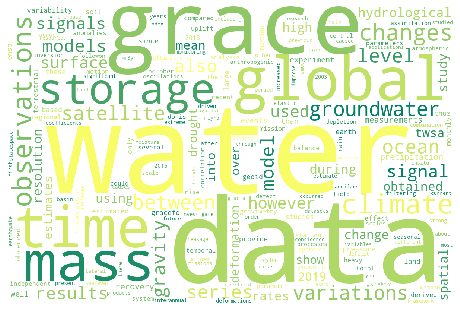

In [27]:
# and now the abstracts wordcloud 
# this time we customise and play around with some parameters
cloud = wordcloud.WordCloud(
    width=1200, 
    height=800,
    background_color='white',
    colormap='summer',
)

# generate
cloud.generate_from_frequencies(z)

# display
myimage = cloud.to_array()
plt.imshow(myimage, interpolation = 'nearest')
plt.gcf().set_size_inches(8,8)
plt.axis('off')
plt.show()

In [28]:
# # if you want to save to file uncomment the lines below
# fout = 'abstracts.jpg'
# cloud.to_file(fout)
# Image(filename=fout, width=600) 

In [29]:
# fetch only the geo-words
geo_words = {key:z[key] for key in z.keys() if 'geo' in key}

sorted(geo_words.items(), key=operator.itemgetter(1), reverse=True)

[('geoid', 10),
 ('geodetic', 8),
 ('geodesy', 5),
 ('geocenter', 3),
 ('geodynamic', 3),
 ('geonet', 3),
 ('geopotential', 3),
 ('geophysical', 2),
 ('geomagnetism', 2),
 ('geometry', 2),
 ('geocentric', 2),
 ('geology', 1),
 ('lageos1', 1),
 ('geodynamics', 1),
 ('geophysics', 1),
 ('geography', 1),
 ('geogravitational', 1),
 ('geometric', 1),
 ('geostrophic', 1),
 ('spacegeodetic', 1)]

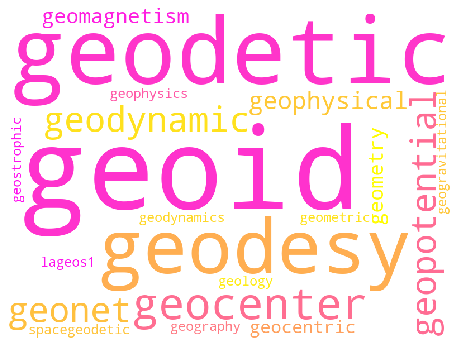

In [30]:
# if len(geo_words) > 1:
cloud = wordcloud.WordCloud(
    width=800, 
    height=600,
    background_color='white', 
    colormap='spring',
)

cloud.generate_from_frequencies(geo_words)

myimage = cloud.to_array()
plt.imshow(myimage, interpolation = 'nearest')
plt.gcf().set_size_inches(8,8)
plt.axis('off')
plt.show()


In [31]:
# # save to file
# fout = 'geo.jpg'
# cloud.to_file(fout)
# Image(filename=fout, width=600) 

<div class=" alert alert-danger"> 
    
<center><font size="5"><b>Word of caution!</b></font></center>
    
</div>

In [32]:
# one can use only the wordclould library but the generated word map includes double words keys!!!

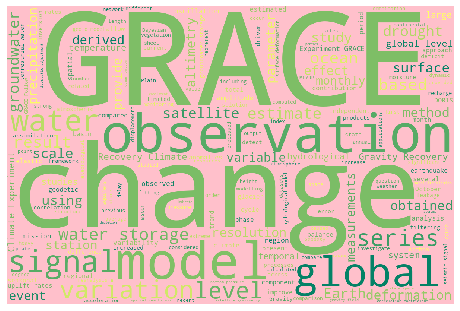

In [33]:
# use the library internal function generate()
wc = wordcloud.WordCloud(
    width=1200, 
    height=800,
    background_color='pink', 
    colormap='summer',
    stopwords=wordcloud.STOPWORDS,
    min_word_length=5,
)

text = ' '.join(A['ABSTRACT'])
wc.generate(text)

plt.imshow(wc.to_array(), interpolation = 'nearest')
plt.gcf().set_size_inches(8,8)
plt.axis('off')
plt.show()

In [34]:
# but double word keys exist!!!
# so I guess there are some issues with the text parsing and thus a user defined function was used.
wc.words_

{'GRACE': 1.0,
 'change': 0.75,
 'observation': 0.609375,
 'model': 0.5625,
 'global': 0.546875,
 'signal': 0.53125,
 'water': 0.5,
 'variation': 0.46875,
 'level': 0.390625,
 'series': 0.390625,
 'water storage': 0.390625,
 'based': 0.359375,
 'ocean': 0.359375,
 'result': 0.359375,
 'estimate': 0.34375,
 'groundwater': 0.328125,
 'drought': 0.296875,
 'satellite': 0.296875,
 'Earth': 0.28125,
 'study': 0.265625,
 'scale': 0.265625,
 'surface': 0.25,
 'using': 0.25,
 'deformation': 0.234375,
 'obtained': 0.234375,
 'method': 0.234375,
 'altimetry': 0.234375,
 'parameter': 0.234375,
 'resolution': 0.21875,
 'provide': 0.21875,
 'effect': 0.21875,
 'precipitation': 0.21875,
 'derived': 0.21875,
 'measurements': 0.203125,
 'event': 0.203125,
 'station': 0.203125,
 'variable': 0.203125,
 'monthly': 0.1875,
 'Gravity Recovery': 0.1875,
 'Recovery Climate': 0.1875,
 'Climate Experiment': 0.1875,
 'global level': 0.1875,
 'studies': 0.171875,
 'large': 0.171875,
 'hydrological': 0.171875,
 '